In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
sns.set_style('darkgrid')

# Excel File Info

In [131]:
bnbdf = pd.read_csv("AirBnBData.csv")
bnbdf.head()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,Excellent
1,NaN,4,0,0,8,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,0,1,0,Good
2,NaN,2,0,1,9,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,0,1,0,Good
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,Excellent
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,Excellent


In [132]:
bnbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        33372 non-null  float64
 1   Person Capacity              41714 non-null  int64  
 2   Multiple Rooms               41714 non-null  int64  
 3   Business                     41714 non-null  int64  
 4   Cleanliness Rating           41714 non-null  int64  
 5   Bedrooms                     41714 non-null  int64  
 6   City Center (km)             40880 non-null  float64
 7   Metro Distance (km)          37543 non-null  float64
 8   Attraction Index             41714 non-null  float64
 9   Normalised Attraction Index  41714 non-null  float64
 10  Restaurant Index             41714 non-null  float64
 11  Normalised Restaurant Index  41714 non-null  float64
 12  Room_Type_Entire home/apt    41714 non-null  int64  
 13  Room_Type_Privat

Plenty of null values in Price, City Center (km) and Metro Distance (km)

# Data Preprocessing

# Dropping Price Null Values

In [133]:
df = bnbdf.dropna(subset=['Price'] )

df

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,Excellent
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,Excellent
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,Excellent
5,552.808567,3,0,0,8,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,0,1,0,Excellent
6,215.124317,2,0,0,10,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,0,1,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41707,115.933899,4,1,0,9,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,0,1,0,Excellent
41709,715.938574,6,0,1,10,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,1,0,0,Excellent
41711,637.168969,2,0,0,10,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,1,0,0,Excellent
41712,301.054157,2,0,0,10,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0,1,0,Good


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33372 entries, 0 to 41713
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        33372 non-null  float64
 1   Person Capacity              33372 non-null  int64  
 2   Multiple Rooms               33372 non-null  int64  
 3   Business                     33372 non-null  int64  
 4   Cleanliness Rating           33372 non-null  int64  
 5   Bedrooms                     33372 non-null  int64  
 6   City Center (km)             32695 non-null  float64
 7   Metro Distance (km)          30006 non-null  float64
 8   Attraction Index             33372 non-null  float64
 9   Normalised Attraction Index  33372 non-null  float64
 10  Restaurant Index             33372 non-null  float64
 11  Normalised Restaurant Index  33372 non-null  float64
 12  Room_Type_Entire home/apt    33372 non-null  int64  
 13  Room_Type_Privat

<Axes: xlabel='City Center (km)', ylabel='Price'>

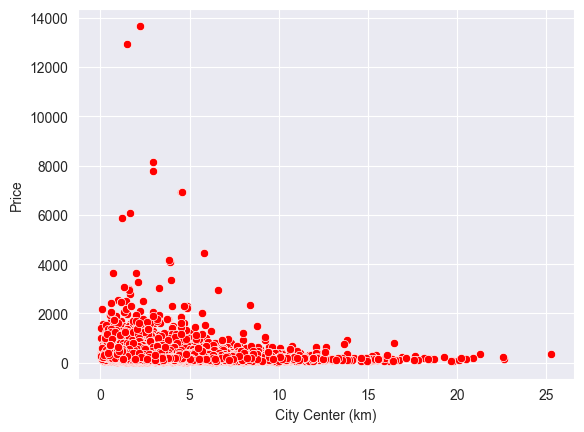

In [135]:
sns.scatterplot(x=df['City Center (km)'], y=df['Price'], color='red')

<Axes: xlabel='City Center (km)', ylabel='Price'>

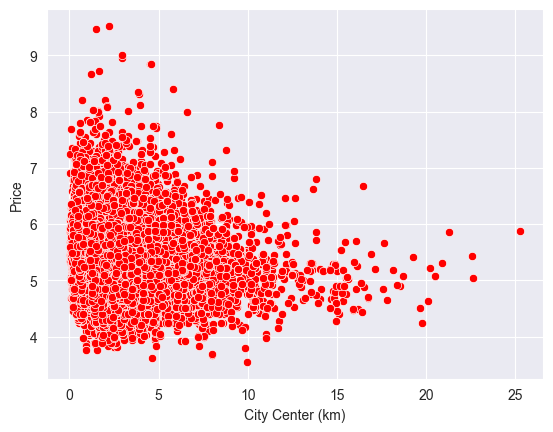

In [136]:
sns.scatterplot(x=df['City Center (km)'], y=np.log(df['Price']), color='red')

<Axes: xlabel='City Center (km)', ylabel='Price'>

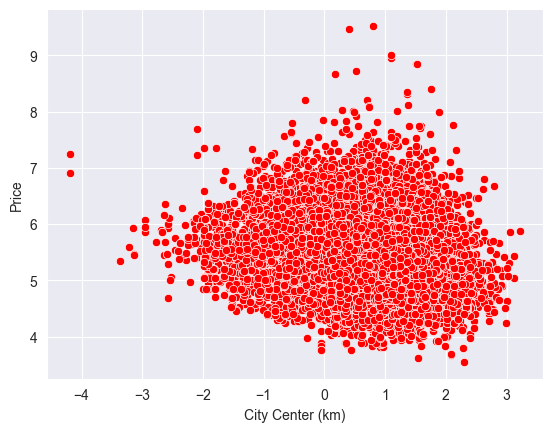

In [137]:
sns.scatterplot(x=np.log(df['City Center (km)']), y=np.log(df['Price']), color='red')

<Axes: xlabel='Metro Distance (km)', ylabel='Price'>

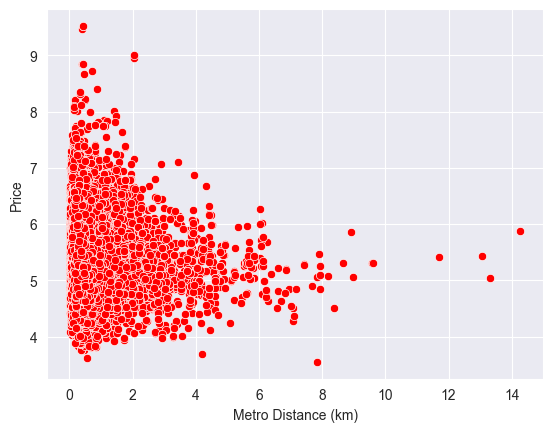

In [138]:
sns.scatterplot(x=df['Metro Distance (km)'], y=np.log(df['Price']), color='red')

# Clean Null Vals using Mean Imputation

In [139]:
df['City Center (km)'].fillna((df['City Center (km)'].mean()), inplace=True)
df['Metro Distance (km)'].fillna((df['Metro Distance (km)'].mean()), inplace=True)

C:\Users\lance\AppData\Local\Temp\ipykernel_11100\3424943250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City Center (km)'].fillna((df['City Center (km)'].mean()), inplace=True)
C:\Users\lance\AppData\Local\Temp\ipykernel_11100\3424943250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Metro Distance (km)'].fillna((df['Metro Distance (km)'].mean()), inplace=True)


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33372 entries, 0 to 41713
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        33372 non-null  float64
 1   Person Capacity              33372 non-null  int64  
 2   Multiple Rooms               33372 non-null  int64  
 3   Business                     33372 non-null  int64  
 4   Cleanliness Rating           33372 non-null  int64  
 5   Bedrooms                     33372 non-null  int64  
 6   City Center (km)             33372 non-null  float64
 7   Metro Distance (km)          33372 non-null  float64
 8   Attraction Index             33372 non-null  float64
 9   Normalised Attraction Index  33372 non-null  float64
 10  Restaurant Index             33372 non-null  float64
 11  Normalised Restaurant Index  33372 non-null  float64
 12  Room_Type_Entire home/apt    33372 non-null  int64  
 13  Room_Type_Privat

# Label Encoding Guest Satisfaction

In [141]:
satisfaction_map = {
    'Very Bad': 0,
    'Bad': 1,
    'Not bad': 2,
    'Good': 3,
    'Excellent': 4
}

df['Guest Satisfaction'] = df['Guest Satisfaction'].map(satisfaction_map)

df['Guest Satisfaction'].value_counts()


C:\Users\lance\AppData\Local\Temp\ipykernel_11100\2688264183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Guest Satisfaction'] = df['Guest Satisfaction'].map(satisfaction_map)


4    26404
3     6409
2      417
0       73
1       69
Name: Guest Satisfaction, dtype: int64

In [142]:
df

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,4
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,4
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,4
5,552.808567,3,0,0,8,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,0,1,0,4
6,215.124317,2,0,0,10,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41707,115.933899,4,1,0,9,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,0,1,0,4
41709,715.938574,6,0,1,10,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,1,0,0,4
41711,637.168969,2,0,0,10,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,1,0,0,4
41712,301.054157,2,0,0,10,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0,1,0,3


# Data Exploration

Looking at some features we expect to explain airbnb prices.

<Axes: xlabel='City Center (km)', ylabel='Price'>

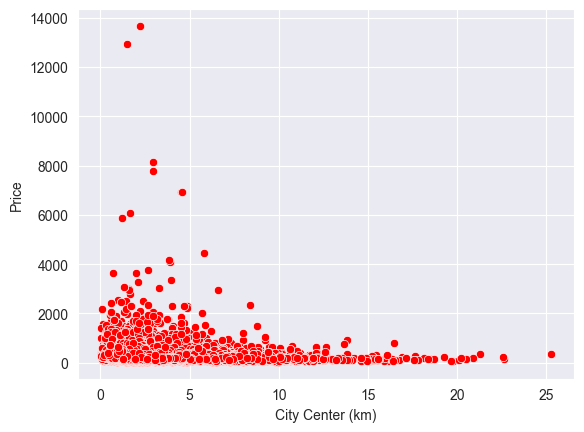

In [143]:
#Exploring relationship between city center and price, a variable we think will be influential on price

sns.scatterplot(x=df['City Center (km)'], y=df['Price'], color='red')

<Axes: xlabel='Metro Distance (km)', ylabel='Price'>

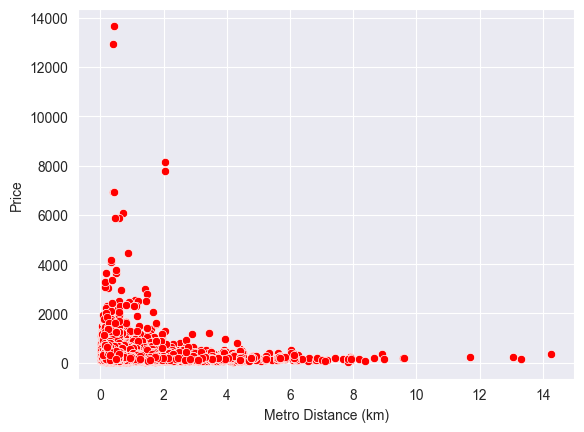

In [144]:
#Exploring relationship between metro distance and price, a variable we think will be influential on price

sns.scatterplot(x=df['Metro Distance (km)'], y=df['Price'], color='red')

# Correlation Analysis


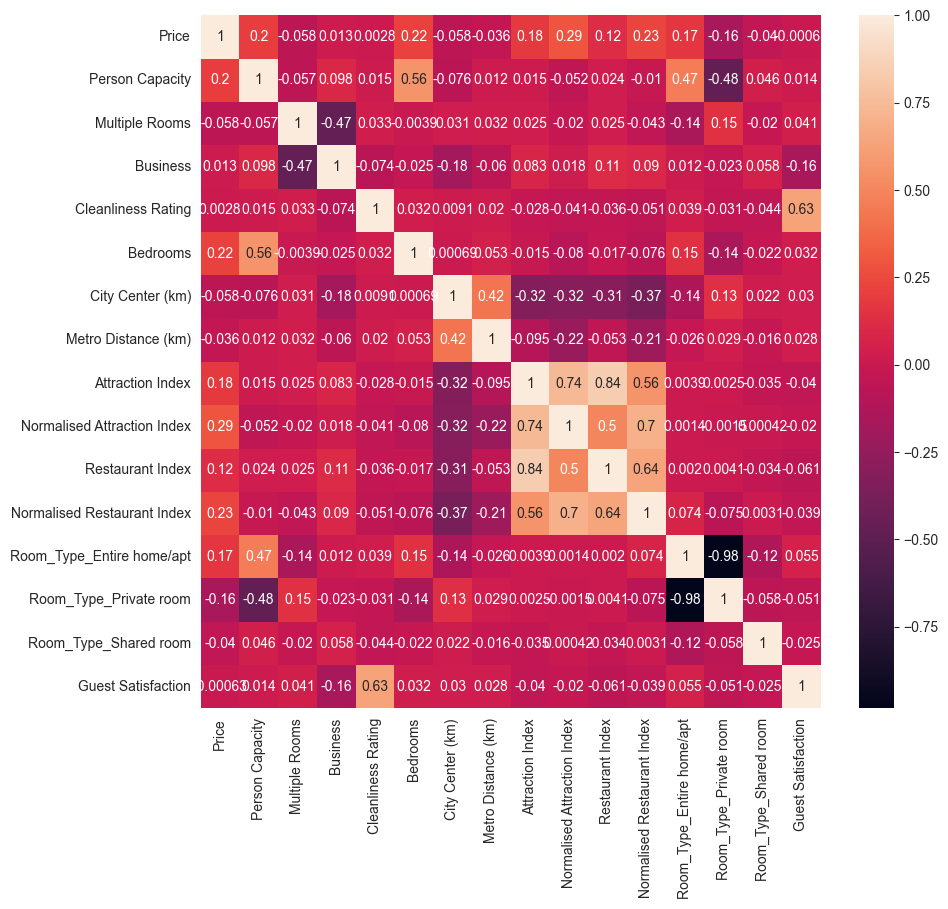

In [145]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.corr(), annot= True)
plt.show()

We have many features, some look like they don't have any correlation to Price. Suprisingly, City Center (km) and Metro Distance (km) seem to have no correlation with the price. 

# Removing Non-Correlated Variables

In [146]:
correlation_matrix = df.corr()

#Find columns with correlation value between -0.2 and 0.2 with 'Price'
cols_to_drop = correlation_matrix[(correlation_matrix['Price'] > -0.2) & (correlation_matrix['Price'] < 0.2)].index.tolist()

#Drop these columns
df_dropped = df.copy()
df_dropped = df.drop(cols_to_drop, axis=1)
df_dropped

,Price,Bedrooms,Normalised Attraction Index,Normalised Restaurant Index
0,194.033698,1,4.166708,6.846473
3,433.529398,2,26.119108,60.973565
4,485.552926,1,29.272733,56.811677
5,552.808567,2,9.255191,15.692376
6,215.124317,1,10.599010,16.916251
...,...,...,...,...
41707,115.933899,1,7.859670,5.039797
41709,715.938574,3,15.712158,10.604584
41711,637.168969,1,12.107921,6.822996
41712,301.054157,1,7.822803,3.832416


# New Correlation with Updated Features

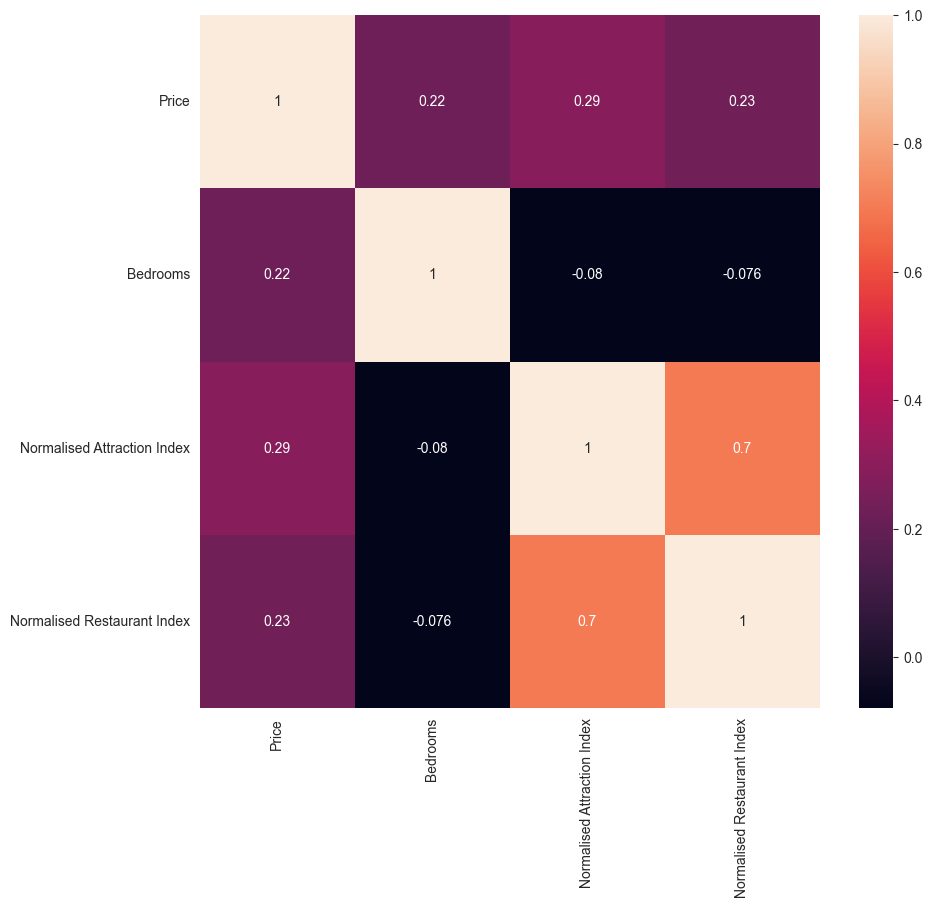

In [147]:
plt.figure(figsize=(10, 9))
sns.heatmap(df_dropped.corr(), annot= True)
plt.show()

# Model

Features being used = ['Bedrooms' 'Normalised Attraction Index' 'Normalised Restaurant Index']


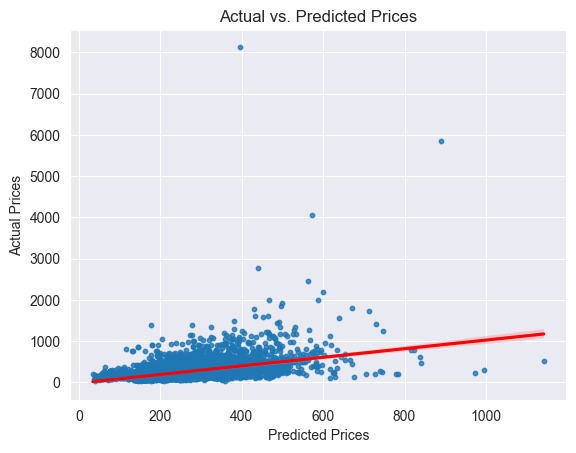

MAE = 106.13, MSE = 40668.64, RSME = 201.66, r^2 = 0.21


In [148]:
print("Features being used = {}".format(df_dropped.columns.values[1:]))

x_values = df_dropped.drop(['Price'], axis = "columns")
y_values = df_dropped['Price']

model = LinearRegression().fit(x_values, y_values)

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

model = LinearRegression().fit(x_train, y_train)

preds = model.predict(x_test)


#Plotting
sns.regplot(x=preds, y=y_test, scatter_kws={'s':10}, line_kws={'color':'red'})

plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print("MAE = {:.2f}, MSE = {:.2f}, RSME = {:.2f}, r^2 = {:.2f}".format(mae,mse,rmse,r2))

# Checking to see the Residuals Distribution

https://www.statology.org/multiple-linear-regression-assumptions/

According to statology, two of the five assumptions of multiple linear regression is that residuals are constantly scattered, and residuals are distributed normally, if these assumptions are violated, the results of our model may not be reliable.

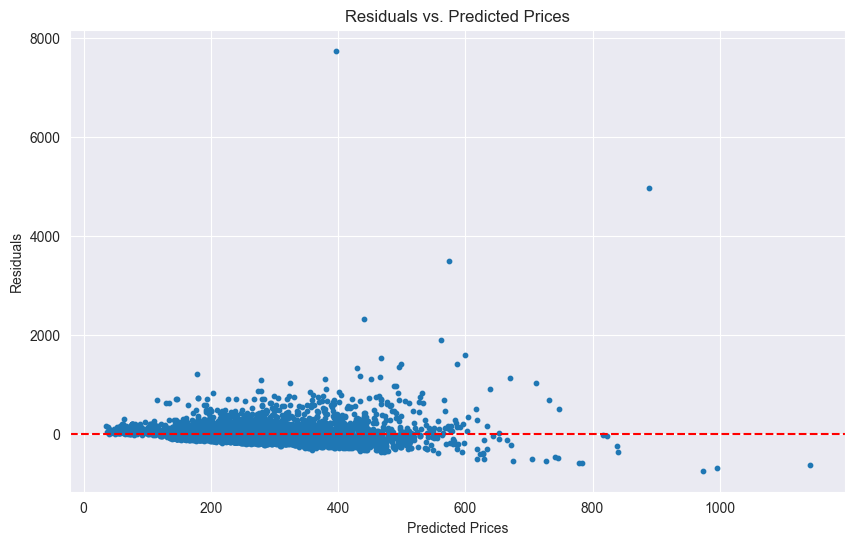

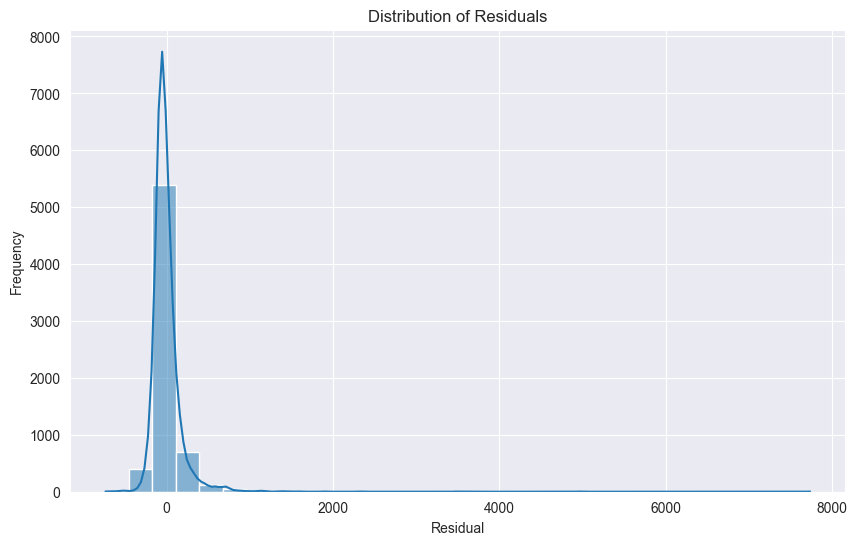

In [149]:
residuals = y_test - preds

#Plotting Residuals vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(preds, residuals, s=10)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

#Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


The majority of the residuals seem to be clustered around the zero line, especially for predicted prices between 0 and 600. Howevever, There's a visible trend of the residuals' spread increasing as the predicted prices increase, which is a violation of one of the key assumptions of linear regression. It implies that the variance of the errors is not constant across all levels of the independent variables.

We can see the distribution of residuals do not follow a normal distribution, in which there is a positive skew. This is another violation of a key assumption of linear regression.

# Improving the Base Model

Our base model only explains 21% of variation in our data, futhermore several key assumptions of linear regression are violated which could be explaining this poor result, therefore we will now explore using feature engineering to try improve our model.

# Feature Engineering

# Analysing Skew

In [150]:
df_improved = df.copy()

We will explore the skew and distribution of our continuous features as continuous features can take on a wide range of values and often exhibit varying levels of skewness. This can directly impact the performance of certain algorithms, especially those that assume normality.

Ordinal and binary features have a limited and defined range of values. Binary features, for example, can only take on two values (0 or 1). This limits the potential for skewness or wide variations in distribution and therefore we will not be exploring the skew for these features

In [151]:
df_improved.select_dtypes(np.number)
continuous_cols = ['City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Normalised Attraction Index', 'Restaurant Index', 'Normalised Restaurant Index']
df_improved.select_dtypes(np.number)

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,4
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,4
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,4
5,552.808567,3,0,0,8,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,0,1,0,4
6,215.124317,2,0,0,10,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41707,115.933899,4,1,0,9,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,0,1,0,4
41709,715.938574,6,0,1,10,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,1,0,0,4
41711,637.168969,2,0,0,10,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,1,0,0,4
41712,301.054157,2,0,0,10,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0,1,0,3


In [152]:
#Skew analysis

scipy.stats.skew(df_improved)

array([17.80377789,  0.65945257,  0.90231779,  0.66083767, -2.86593665,
        1.39341742,  2.17271905,  4.8660684 ,  2.69411174,  2.25657768,
        1.56982036,  0.84700593, -0.75909577,  0.7949115 , 11.61499595,
       -2.58213149])

City Center (km) skew without log transformation = 2.1727190487990495
City Center (km) skew with log transformation = -0.6449323481311002


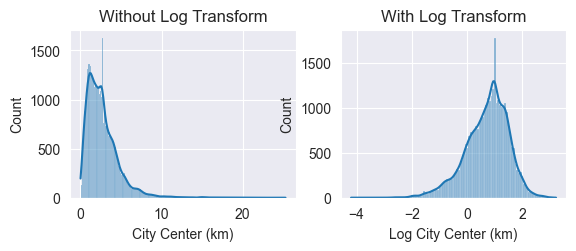

Metro Distance (km) skew without log transformation = 4.866068402173028
Metro Distance (km) skew with log transformation = -0.06345698630153176


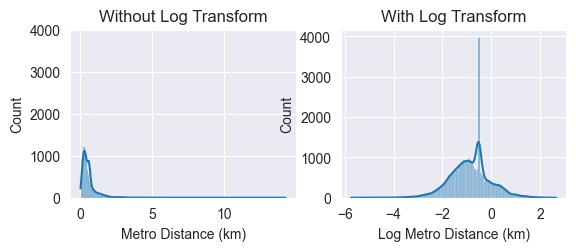

Attraction Index skew without log transformation = 2.694111739152331
Attraction Index skew with log transformation = -0.1536203394349035


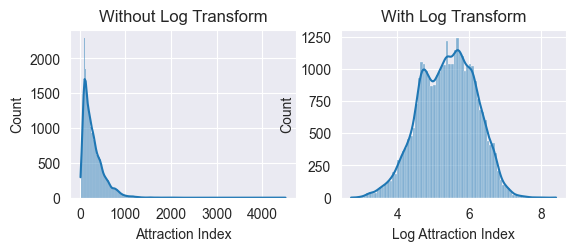

Normalised Attraction Index skew without log transformation = 2.2565776766064944
Normalised Attraction Index skew with log transformation = -0.2101156355908083


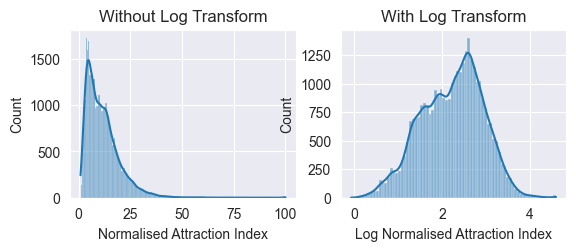

Restaurant Index skew without log transformation = 1.5698203615687358
Restaurant Index skew with log transformation = -0.36565666519205026


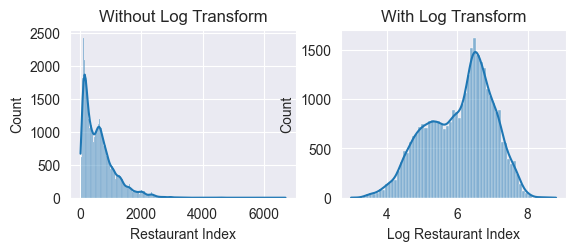

Normalised Restaurant Index skew without log transformation = 0.8470059323035708
Normalised Restaurant Index skew with log transformation = -0.8967493807152032


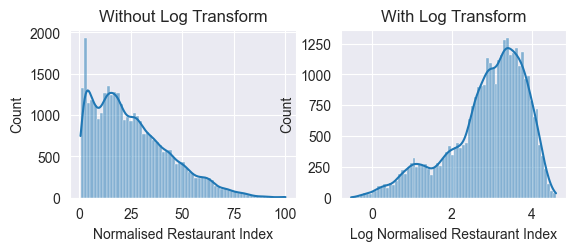

In [153]:
#Analysis skew for each continuous column
for col in continuous_cols:
    plt.subplot(2, 2, 1)

    sns.histplot(df_improved[col],kde = True)
    plt.title("Without Log Transform")

    print("{} skew without log transformation = {}".format(col,scipy.stats.skew(df_improved[col])))

    plt.subplot(2, 2, 2)

    sns.histplot(np.log(df_improved[col]),kde = True)
    plt.xlabel("Log {}".format(col))
    plt.title("With Log Transform")
    print("{} skew with log transformation = {}".format(col,scipy.stats.skew(np.log(df_improved[col]))))

    plt.show()

There is a positive skew for all continuous variables, apart from normalised restaurant index. The skew is improved for all continuous variables, and returns a normal distribution for the given feature, apart from normalised restaurant index. 

# Target Feature Analysis

Price skew without log transformation = Normalised Restaurant Index
Price skew with log transformation = Normalised Restaurant Index


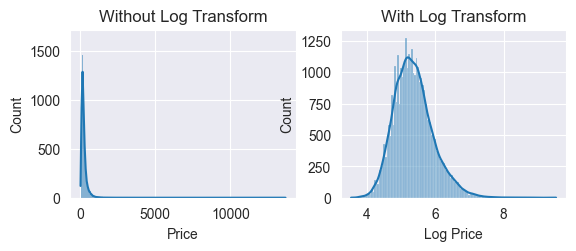

In [154]:
plt.subplot(2, 2, 1)

sns.histplot(df_improved['Price'], kde=True)
plt.title("Without Log Transform")
print("Price skew without log transformation = {}".format(col,scipy.stats.skew(df_improved['Price'])))

plt.subplot(2, 2, 2)

sns.histplot(np.log(df_improved['Price']),kde=True)
plt.xlabel("Log Price")
plt.title("With Log Transform")
print("Price skew with log transformation = {}".format(col,scipy.stats.skew(np.log(df_improved['Price']))))

plt.show()

In [155]:
#Log transforming features and creating updated dataframe

logged_df_improved = df_improved.copy()

continuous_cols.remove('Normalised Restaurant Index') #Removing Normalised Restaurant Index as no improvement for skew after log transformation

for col in continuous_cols:
    logged_df_improved[col] = np.log(logged_df_improved[col])

logged_df_improved['Price'] = np.log(logged_df_improved['Price'])

<Axes: xlabel='Price', ylabel='Count'>

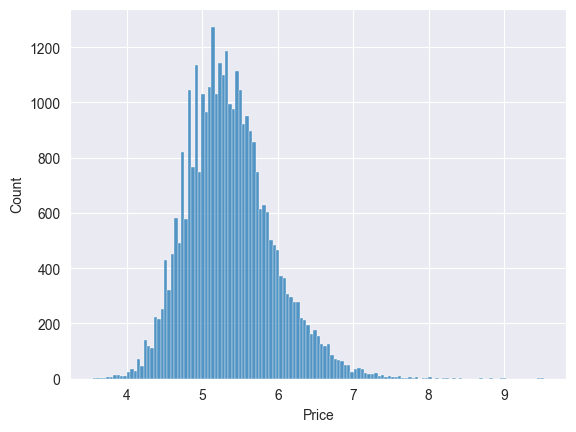

In [156]:
#Exploring price in new dataframe

sns.histplot(logged_df_improved['Price'])

In [157]:
#Viewing logged dataframe

logged_df_improved

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,5.268032,2,1,0,10,1,1.614020,0.931920,4.365521,1.427126,4.587555,6.846473,0,1,0,4
3,6.071960,4,0,1,9,2,-0.954870,-0.821262,6.201062,3.262667,6.774262,60.973565,0,1,0,4
4,6.185288,2,0,0,10,1,-0.607450,-1.143528,6.315051,3.376656,6.703563,56.811677,0,1,0,4
5,6.315012,3,0,0,8,2,0.756788,0.644308,5.163579,2.225185,5.416996,15.692376,0,1,0,4
6,5.371216,2,0,0,10,1,0.631852,-0.315058,5.299155,2.360761,5.492096,16.916251,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41707,4.753020,4,1,0,9,1,1.112493,-1.177034,4.698218,2.061745,5.340025,5.039797,0,1,0,4
41709,6.573594,6,0,1,10,3,-0.634537,-1.999174,5.390908,2.754435,6.083945,10.604584,1,0,0,4
41711,6.457035,2,0,0,10,1,-0.005966,-1.596824,5.130333,2.493860,5.642958,6.822996,1,0,0,4
41712,5.707290,2,0,0,10,1,1.113205,-1.246760,4.693516,2.057043,5.066155,3.832416,0,1,0,3


# Correlation Analysis of Log Transformed Dataframe

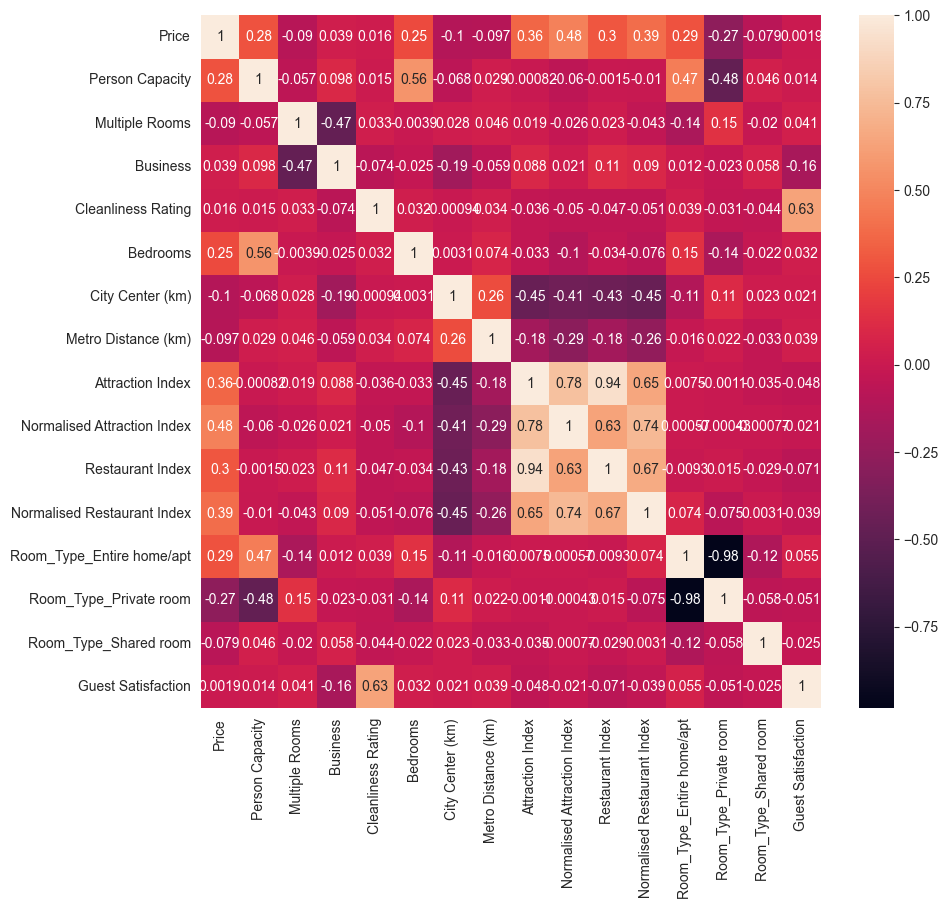

In [158]:
plt.figure(figsize=(10, 9))
sns.heatmap(logged_df_improved.corr(), annot= True)
plt.show()

# Removing Non-Correlated Variables

In [159]:
# Assuming df is your dataframe
correlation_matrix = logged_df_improved.corr()

# Find columns with correlation value between -0.05 and 0.05 with 'Price'
cols_to_drop = correlation_matrix[(correlation_matrix['Price'] > -0.2) & (correlation_matrix['Price'] < 0.2)].index.tolist()

# Drop these columns
logged_df_improved = logged_df_improved.drop(cols_to_drop, axis=1)

print(logged_df_improved.columns)

logged_df_improved

Index(['Price', 'Person Capacity', 'Bedrooms', 'Attraction Index',
       'Normalised Attraction Index', 'Restaurant Index',
       'Normalised Restaurant Index', 'Room_Type_Entire home/apt',
       'Room_Type_Private room'],
      dtype='object')


,Price,Person Capacity,Bedrooms,Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room
0,5.268032,2,1,4.365521,1.427126,4.587555,6.846473,0,1
3,6.071960,4,2,6.201062,3.262667,6.774262,60.973565,0,1
4,6.185288,2,1,6.315051,3.376656,6.703563,56.811677,0,1
5,6.315012,3,2,5.163579,2.225185,5.416996,15.692376,0,1
6,5.371216,2,1,5.299155,2.360761,5.492096,16.916251,0,1
...,...,...,...,...,...,...,...,...,...
41707,4.753020,4,1,4.698218,2.061745,5.340025,5.039797,0,1
41709,6.573594,6,3,5.390908,2.754435,6.083945,10.604584,1,0
41711,6.457035,2,1,5.130333,2.493860,5.642958,6.822996,1,0
41712,5.707290,2,1,4.693516,2.057043,5.066155,3.832416,0,1


# New Correlation with Updated Features

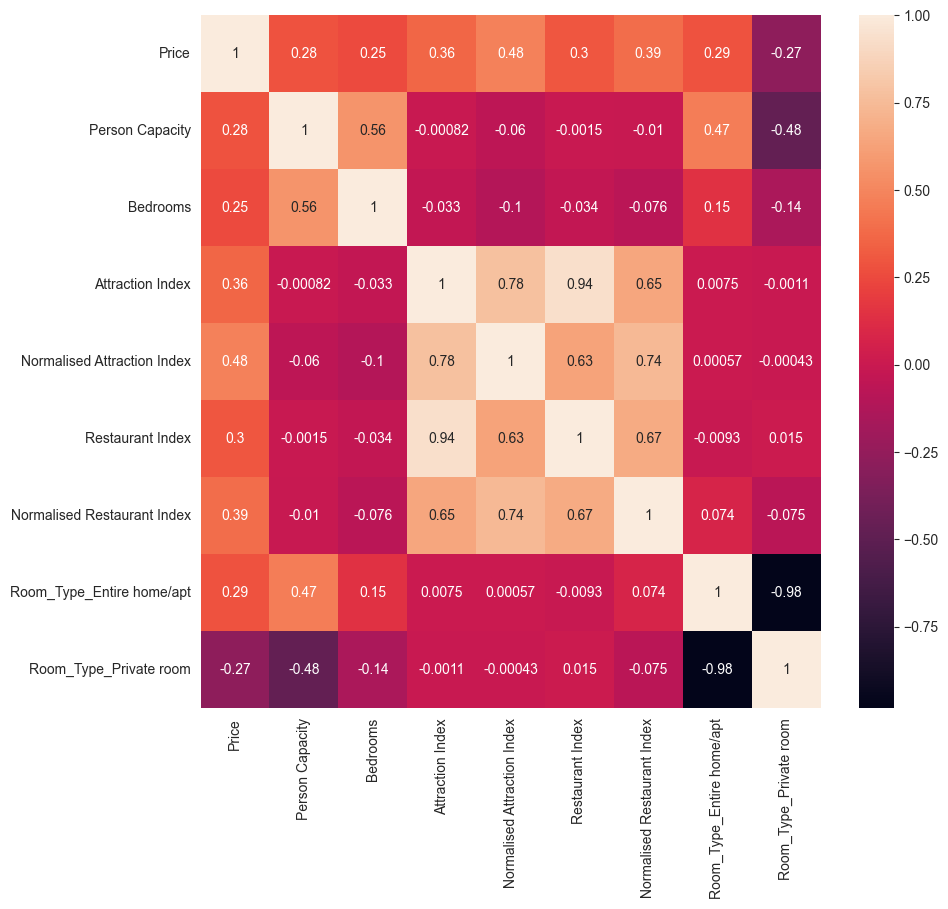

In [160]:
plt.figure(figsize=(10, 9))
sns.heatmap(logged_df_improved.corr(), annot= True)
plt.show()

We can see that we have still retained both Normalised Attraction Index and Attraction Index, which have are moderately strong correlation of 0.78. This makes sense, as they are the same feature normalised. To remove the risk of multicollinearity, in which two highly correlated variables are present, making it difficult to identify the individual effect of each feature on  price. We will drop Attraction Index as a feature as this has less correlation to price (0.36) compared to Normalised Attraction Index (0.48).

We have a similar situation regarding Normalised Restaurant Index and Restaurant Index, and Room_Type_Entire home/apt and Room_Type_Private room features in which we will drop the Restaurant Index and Room_Type_Private room feature respectively.

Drop Norm Restuarant

In [161]:
logged_df_improved = logged_df_improved.drop(['Restaurant Index', 'Attraction Index','Room_Type_Private room', 'Normalised Restaurant Index'], axis=1)

<Axes: >

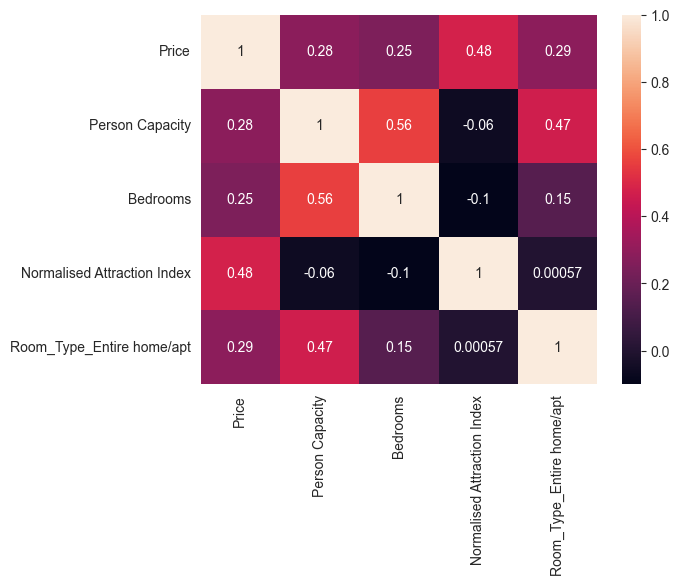

In [162]:
sns.heatmap(logged_df_improved.corr(), annot= True)

In [163]:
logged_df_improved.columns

Index(['Price', 'Person Capacity', 'Bedrooms', 'Normalised Attraction Index',
       'Room_Type_Entire home/apt'],
      dtype='object')

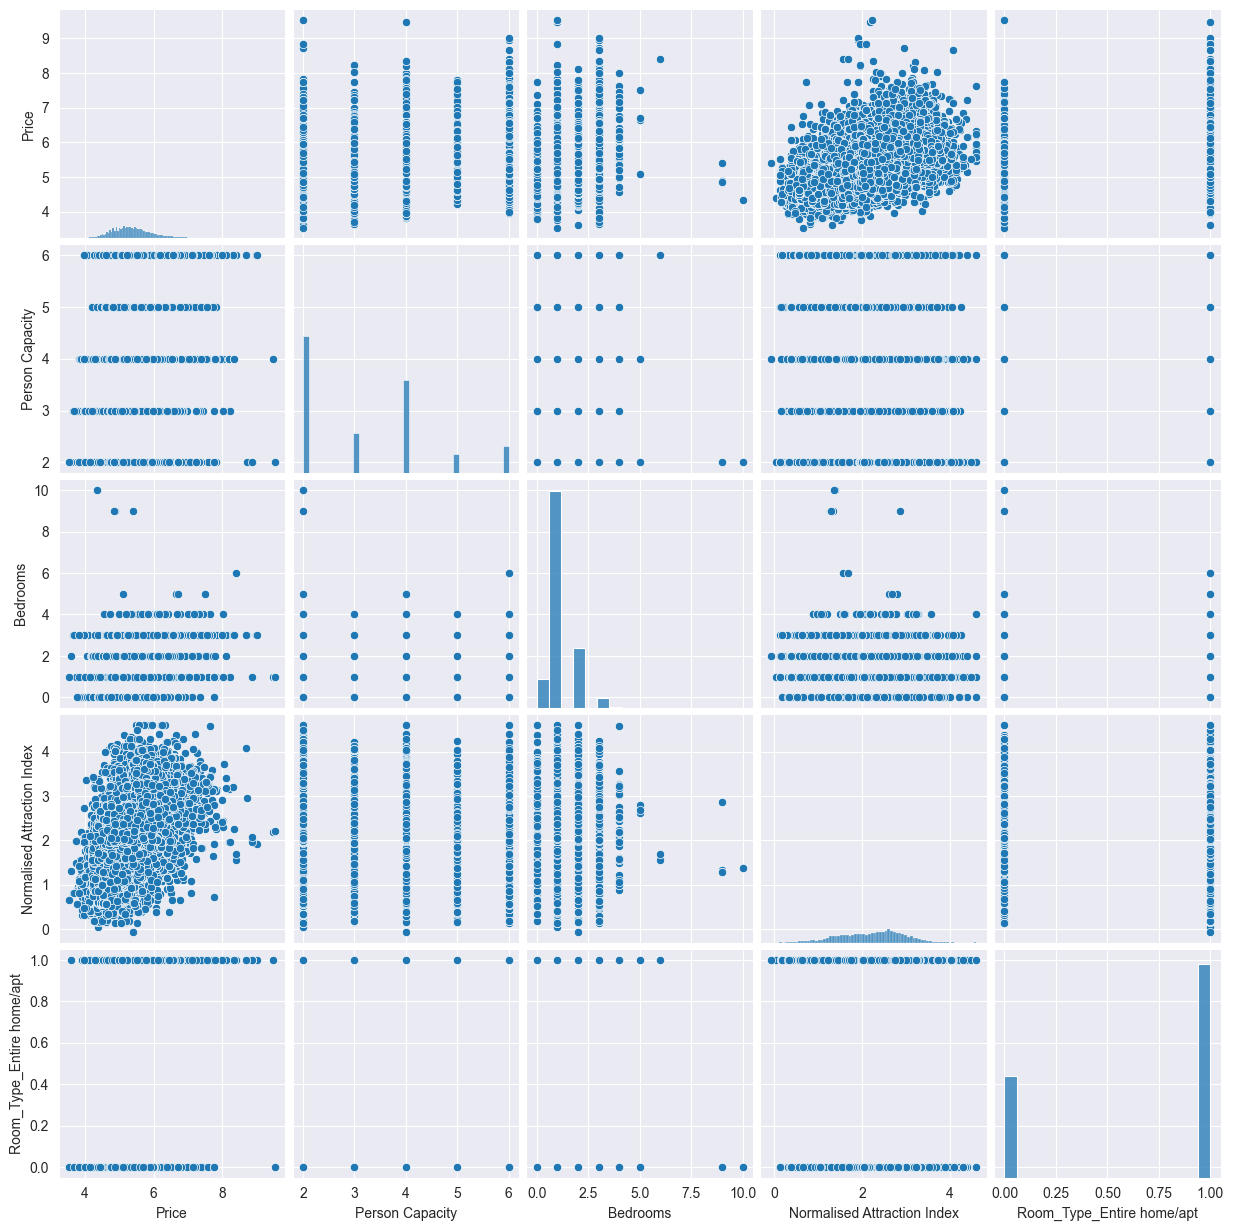

In [164]:
sns.pairplot(logged_df_improved)

# Logged Model

Original Scale: MAE = 92.96, MSE = 40016.90, RMSE = 200.04


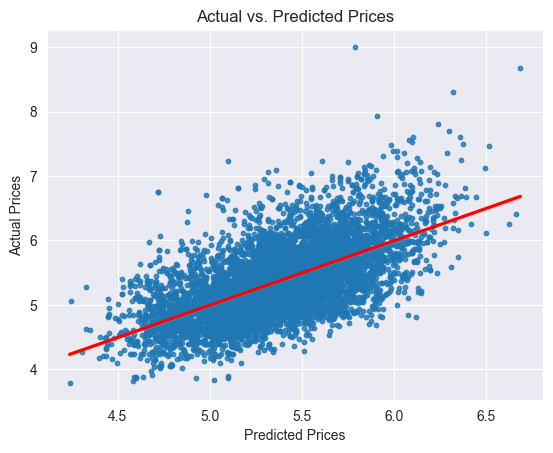

MAE = 0.34, MSE = 0.20, RSME = 0.44, r^2 = 0.39


In [165]:
x_values = logged_df_improved.drop(['Price'], axis = "columns")
y_values = logged_df_improved['Price']

model = LinearRegression().fit(x_values, y_values)

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

model = LinearRegression().fit(x_train, y_train)

preds = model.predict(x_test)

#Back-transform predictions and test values
preds_exp = np.exp(preds)
y_test_exp = np.exp(y_test)

#Compute error metrics in original scale
mae_original = mean_absolute_error(y_test_exp, preds_exp)
mse_original = mean_squared_error(y_test_exp, preds_exp)
rmse_original = np.sqrt(mse_original)

print("Original Scale: MAE = {:.2f}, MSE = {:.2f}, RMSE = {:.2f}".format(mae_original, mse_original, rmse_original))

#Plotting
sns.regplot(x=preds, y=y_test, scatter_kws={'s':10}, line_kws={'color':'red'})

plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print("MAE = {:.2f}, MSE = {:.2f}, RSME = {:.2f}, r^2 = {:.2f}".format(mae,mse,rmse,r2))

# Residual Analysis

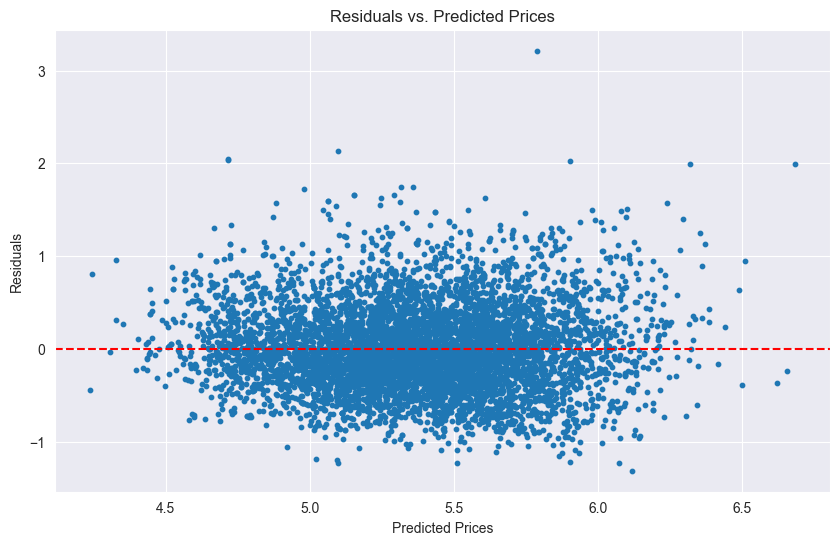

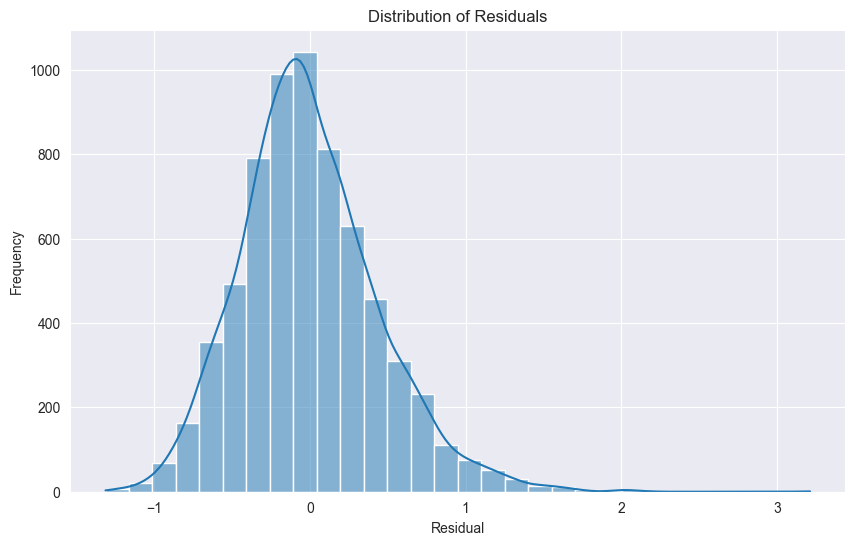

In [174]:
residuals = y_test - preds

#Plotting Residuals vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(preds, residuals, s=10)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

#Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

The majority of the residuals now seem to have a constant scatter around 0. This is a big improvement compared to our first model. 

There is still a positive skew in the residuals, therefore we can see there is still much more room for improvement from this log transformed model.

# Backtransforming the model

Original Scale: MAE = 92.96, MSE = 40016.90, RMSE = 200.04


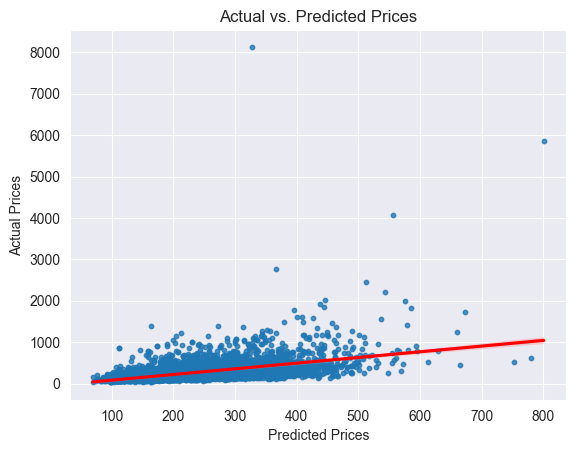

In [172]:
#Back-transform predictions and test values
preds_exp = np.exp(preds)
y_test_exp = np.exp(y_test)

#Compute error metrics in original scale
mae_original = mean_absolute_error(y_test_exp, preds_exp)
mse_original = mean_squared_error(y_test_exp, preds_exp)
rmse_original = np.sqrt(mse_original)

print("Original Scale: MAE = {:.2f}, MSE = {:.2f}, RMSE = {:.2f}".format(mae_original, mse_original, rmse_original))

#Plotting on original scale
sns.regplot(x=preds_exp, y=y_test_exp, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.ylabel('Actual Prices') #Changed
plt.xlabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [167]:
#Getting the coefficients and intercept

coef = model.coef_
intercept = model.intercept_

print("Intercept:", round(intercept,2))
print("\nCoefficients:")
for i, col in enumerate(x_train.columns):
    print(col, ":", round(coef[i],2))


Intercept: 3.91

Coefficients:
Person Capacity : 0.04
Bedrooms : 0.19
Normalised Attraction Index : 0.41
Room_Type_Entire home/apt : 0.25


To explore the effects these features have on a normal scale we can back transform.

In [168]:
#Back transforming the coefficients and intercept
print("Intercept: ${}".format(round(np.exp(intercept),2)))

print("\nCoefficients:")
for i, col in enumerate(x_train.columns):
    print("{}: {}".format(col,round(np.exp(coef[i]),2)))

Intercept: $50.09

Coefficients:
Person Capacity: 1.05
Bedrooms: 1.21
Normalised Attraction Index: 1.51
Room_Type_Entire home/apt: 1.29


# Model Interpretation

Our predictive model estimates the price of an airbnb listing is based on several significant variables: person capacity, number of bedrooms, a normalized attraction index, and the type of room offered.

After backtransformation of the logged model, when all factors are set at zero, the foundational price is $50 in the original scale. 

Furthermore, each additional person a listing can accommodate potentially raises its price by about 4%. 

Each added bedroom tends to increase the price by roughly 21%. 

The attractiveness of the location, captured by the normalized attraction index, shows for every unit increase in this index, the price may increase by 51%. 

Lastly, the type of room holds its unique influence: opting for an "Entire home/apt" can mean paying around 28% more compared to other listing types.

Overall, while each factor contributes to shaping the price, the number of bedrooms and the attractiveness of the listing rise as the most influential drivers in the pricing model.